In [4]:
import os
import sys
from pathlib import Path
from glob import glob
import json


currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
sys.path.insert(1, os.path.join(parentdir, 'evaluation')) 
sys.path.insert(1, os.path.join(parentdir, 'configuration')) 

from evaluation import metrics_csvreader, optimal_parameters
from configuration import get_config as config

2024-05-27 13:54:29.606534: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:54:30.809380: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:54:35.055088: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 13:54:53.288367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
csvfile = "/work/mi186veva-results/MainExperiment_3d_3_old/3D3_Ns_WT_Sm_S5_BT_B0.15_B0.7_/Results_with_EarlyStopping/metrics_by_threshold_0.364.csv"
comparison = "/work/mi186veva-results/MainExperiment_3d_3_old/3D3_Ns_WT_Sm_S5_BT_B0.15_B0.7_/Results_with_EarlyStopping/compare_all_thresholds.csv"

metrics = metrics_csvreader.MetricsCsvReaderComparisonFiles().read_metrics(comparison)

In [ ]:
folders = glob("/work/mi186veva-results/MainExperiment_3d_3_fixed_background/*/")

print(len(folders))

groups = {}

for folder in folders:
    name = folder.split("/")[-2]
    csvfile = os.path.join(folder, "Results_with_EarlyStopping", "metrics_by_threshold_0.364.csv")
    metrics = metrics_csvreader.MetricsCsvReader().read_metrics(csvfile)
    
    value = str(metrics["Accuracy"]["mean"])
    if not str(value) in groups:
        groups[value] = []
    groups[value].append(name)
    
print(json.dumps(groups, indent = 4))

In [12]:
import csv

def write_to_csv(row_to_add):
        file_path = 'results.csv'

        with open(file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(row_to_add)
            
def parse_combination_parameters(name):
    parts = name.split('_')
    
    scaling = parts[2]
    if scaling[1] == 'l':
        scaling = 'normalization'
    elif scaling[1] == 's':
        scaling = 'svn'
        
    sample_weights = parts[3]
    if sample_weights[1] == 'T':
        sample_weights = True
    elif sample_weights[1] == 'F':
        sample_weights = False
        
    smoothing = parts[4]
    if len(smoothing) == 1:
        smoothing = None
    else:
        smoothing = smoothing[1]
    
    smoothing_value = parts[5]
    smoothing_value = float(smoothing_value[1:])
    
    background = parts[6]
    if background[1] == 'T':
        background = True
    elif background[1] == 'F':
        background = False
        
    background_blood = parts[7]
    background_blood = float(background_blood[1:])
    
    background_light = parts[8]
    background_light = float(background_light[1:])
    
    return scaling, sample_weights, smoothing, smoothing_value, background, background_blood, background_light
    

parse_combination_parameters('164_3D3_Nl_WF_Sm_S3_BT_B0.1_B0.4_')

('normalization', False, 'm', 3.0, True, 0.1, 0.4)

In [233]:
root_folder = "/work/mi186veva-results/MainExperiment_3d_3_fixed_background"
folders = glob(root_folder + "/*/")

print(len(folders))

column_names = ['Name', 
              'Scaling', 
              'Sample weights', 
              'Smoothing', 
              'Smoothing_value', 
              'Background', 
              'Background_blood', 
              'Background_light',
              'Threshold',
              'Sensitivity',
              'Specificity',
              'Mean between sensitivity and specificity']
write_to_csv(column_names)

table = []

for folder in folders:
    name = folder.split("/")[-2]
    scaling, sample_weights, smoothing, smoothing_value, background, background_blood, background_light = parse_combination_parameters(name)
    optimal_threshold_finder = optimal_parameters.OptimalThreshold(config, root_folder, prints=False)
    print(name)
    folder_with_checkoint = os.path.join(folder, "Results_with_EarlyStopping")
    results = optimal_threshold_finder.find_optimal_threshold_in_checkpoint(folder_with_checkoint)
    thr, sens, spec, mean, _ = results
    
    row = [name,
          scaling, 
          sample_weights, 
          smoothing, 
          smoothing_value, 
          background, 
          background_blood, 
          background_light, 
          name, 
          thr[0], 
          sens[0], 
          spec[0], 
          mean]
    
    table.append(row)
    write_to_csv(row)


221
164_3D3_Nl_WF_Sm_S3_BT_B0.1_B0.4_
158_3D3_Nl_WT_Sg_S1.5_BT_B0.15_B0.25_
90_3D3_Ns_WF_Sg_S1_BF_B0.1_B0.25_
207_3D3_Nl_WF_Sg_S1.5_BF_B0.1_B0.25_
82_3D3_Ns_WF_Sg_S0.5_BT_B0.1_B0.25_
190_3D3_Nl_WF_Sg_S0.5_BT_B0.1_B0.25_
182_3D3_Nl_WF_Sm_S7_BT_B0.1_B0.4_
219_3D3_Ns_WT_S_S-1_BT_B0.1_B0.6_
129_3D3_Nl_WT_Sm_S7_BT_B0.1_B0.6_
208_3D3_Nl_WF_Sg_S1.5_BT_B0.1_B0.25_
110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_
103_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.7_
77_3D3_Ns_WF_Sm_S7_BT_B0.15_B0.25_
55_3D3_Ns_WF_Sm_S3_BT_B0.1_B0.25_
0_3D3_Ns_WT_Sm_S3_BF_B0.1_B0.25_
23_3D3_Ns_WT_Sm_S7_BT_B0.15_B0.25_
56_3D3_Ns_WF_Sm_S3_BT_B0.1_B0.4_
216_3D3_Ns_WT_S_S-1_BF_B0.1_B0.25_
61_3D3_Ns_WF_Sm_S3_BT_B0.15_B0.6_
220_3D3_Ns_WT_S_S-1_BT_B0.1_B0.7_
32_3D3_Ns_WT_Sg_S0.5_BT_B0.15_B0.25_
22_3D3_Ns_WT_Sm_S7_BT_B0.1_B0.7_
29_3D3_Ns_WT_Sg_S0.5_BT_B0.1_B0.4_
187_3D3_Nl_WF_Sm_S7_BT_B0.15_B0.6_
194_3D3_Nl_WF_Sg_S0.5_BT_B0.15_B0.25_
163_3D3_Nl_WF_Sm_S3_BT_B0.1_B0.25_
115_3D3_Nl_WT_Sm_S3_BT_B0.15_B0.6_
100_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.25_
131_3D3_Nl_WT

In [230]:
def draw_smoothing(column_index):
    median_indexes = table[:, 3] == 'm'
    gaussian_indexes = table[:, 3] == 'g'
    no_smoothing_indexes = table[:, 3] == None
    plt.scatter(column_index * np.ones(table.shape[0])[median_indexes] , 
                np.arange(table.shape[0])[median_indexes], 
                s=2 * np.power(table[:, 4][median_indexes].astype(int), 2), 
                alpha=table[:, 4][median_indexes] / 7,
                c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$M$')
    plt.scatter(column_index * np.ones(table.shape[0])[gaussian_indexes] , 
                np.arange(table.shape[0])[gaussian_indexes], 
                s=2 * np.power((table[:, 4][gaussian_indexes] * 4).astype(int), 2), 
                alpha=table[:, 4][gaussian_indexes] / 2,
                marker='$G$')
                #edgecolors='orange',
                #facecolors='none')
    plt.scatter(column_index * np.ones(table.shape[0])[no_smoothing_indexes] , 
                np.arange(table.shape[0])[no_smoothing_indexes], 
                #s=(table[:, 4][no_smoothing_indexes] * 10).astype(int), 
                marker='X', 
                c='r')
    
def draw_background(column_index):
    def draw_no_background(column_index):
        plt.scatter(column_index * np.ones(table.shape[0])[no_background_indexes] , 
                np.arange(table.shape[0])[no_background_indexes], 
                #s=(table[:, 4][no_smoothing_indexes] * 10).astype(int), 
                marker='X', 
                c='r')
    no_background_indexes = table[:, 5] == False
    background_indexes = table[:, 5] == True
    
    draw_no_background(column_index)
    draw_no_background(column_index+1)
        
    plt.scatter(column_index * np.ones(table.shape[0])[background_indexes] , 
                np.arange(table.shape[0])[background_indexes], 
                s=[s*3 if s==15 else s for s in (table[:, 6] * 100).astype(int)[background_indexes]],
                marker='o',
                color='brown',
                alpha=[s*4 if s==0.15 else s*2 for s in table[:, 6][background_indexes]])
                #edgecolors='green',
                #facecolors='none')
    
    print(np.ones(table.shape[0])[background_indexes].shape)
    print(table[:, 7][background_indexes].shape)
    plt.scatter((column_index + 1) * np.ones(table.shape[0])[background_indexes] , 
                np.arange(table.shape[0])[background_indexes], 
                s=np.power((table[:, 7] * 100).astype(int)[background_indexes], 1.1),
                marker='o',
                color='gray',
                #edgecolors='gray',
                #facecolors='none',
                alpha=table[:, 7][background_indexes])
    
def draw_scaling(column_index):
    norm_indexes = table[:, 1] == 'normalization'
    svn_indexes = table[:, 1] == 'svn'
    
    plt.scatter(column_index * np.ones(table.shape[0])[norm_indexes] , 
                np.arange(table.shape[0])[norm_indexes], 
                s=5000, 
                #alpha=table[:, 4][norm_indexes] / 7,
                #c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$normalization$')
    plt.scatter(column_index * np.ones(table.shape[0])[svn_indexes] , 
                np.arange(table.shape[0])[svn_indexes], 
                s=500, 
                #alpha=table[:, 4][svn_indexes] / 2,
                marker='$svn$')
    
def draw_sample_weights(column_index):
    with_SW = table[:, 2] == True
    without_SW = table[:, 2] == False
    
    plt.scatter(column_index * np.ones(table.shape[0])[with_SW] , 
                np.arange(table.shape[0])[with_SW], 
                s=100, 
                #alpha=table[:, 4][norm_indexes] / 7,
                #c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$\u2713$')
    plt.scatter(column_index * np.ones(table.shape[0])[without_SW] , 
                np.arange(table.shape[0])[without_SW], 
                s=50, 
                #alpha=table[:, 4][svn_indexes] / 2,
                marker='X')

['110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_' 'normalization' True 'm' 3.0 True 0.1
 0.4 '110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_' 0.5092 0.38349637 0.63287055
 0.5081835]
['64_3D3_Ns_WF_Sm_S5_BT_B0.1_B0.25_' 'svn' False 'm' 5.0 True 0.1 0.25
 '64_3D3_Ns_WF_Sm_S5_BT_B0.1_B0.25_' 0.479 0.75003195 0.7514524 0.7507422]
(196,)
(196,)


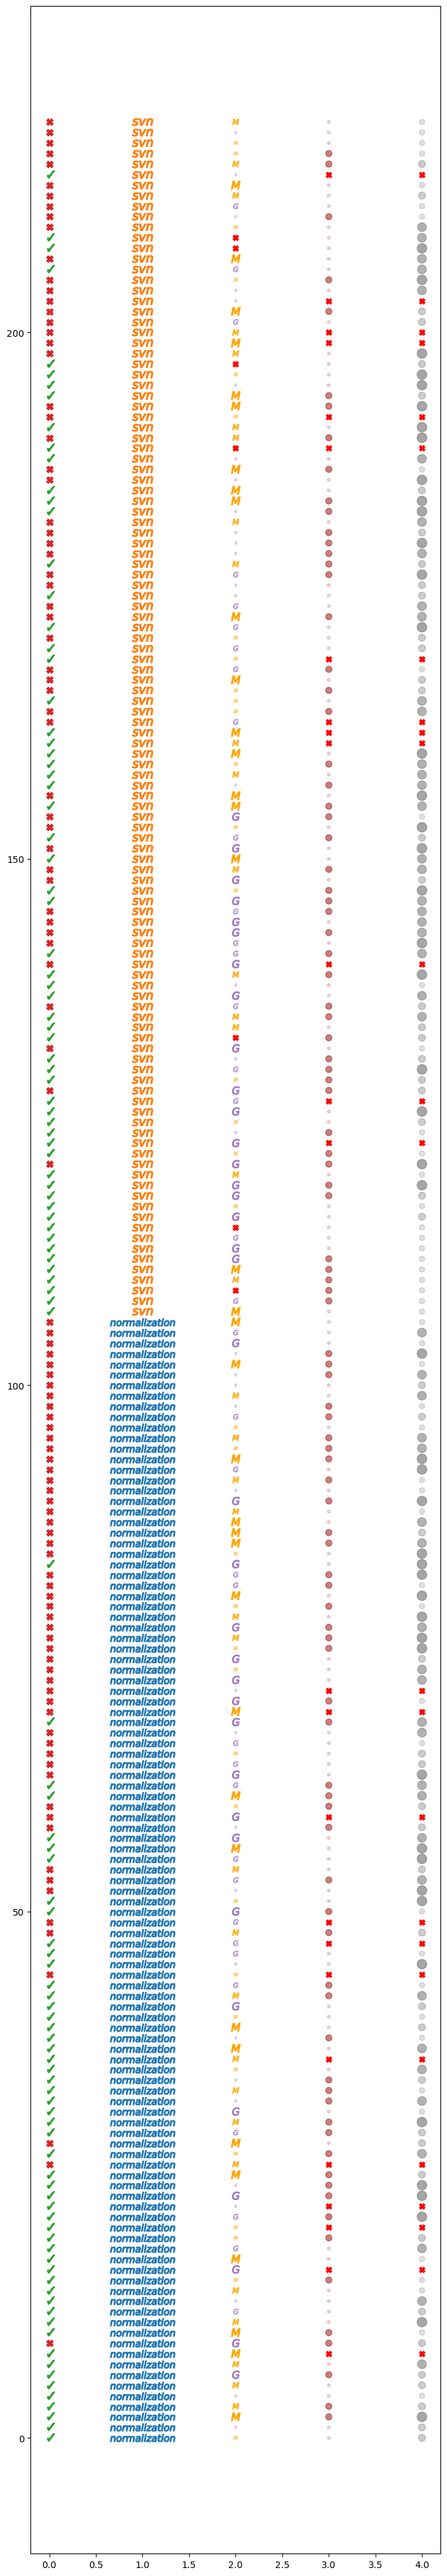

In [238]:
import matplotlib.pyplot as plt
import numpy as np

table = np.array(table)


#$\u2713$ - галочка

sorted_indices = np.argsort(table[:, 10])

# Sort the entire array by these indices
table = table[sorted_indices]
print(table[0])
print(table[-1])

#plt.figure(dpi=300)
plt.figure(figsize=(8, 50)) 

draw_scaling(column_index=1)
draw_sample_weights(column_index=0)
draw_smoothing(column_index=2)
draw_background(column_index=3)

plt.savefig('results.png')
plt.show()


In [18]:


folders = glob("/work/mi186veva-results/MainExperiment_3d_3_old/*/")

print(len(folders))

groups = {}

for folder in folders:
    name = folder.split("/")[-2]
    csvfile = os.path.join(folder, "Results_with_EarlyStopping", "metrics_by_threshold_0.364.csv")
    metrics = metrics_csvreader.MetricsCsvReader().read_metrics(csvfile)
    
    value = str(metrics["Accuracy"]["mean"])
    if not str(value) in groups:
        groups[value] = []
    groups[value].append(name)
    
print(json.dumps(groups, indent = 4))

249
{
    "0.1024843258534392": [
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.7_",
        "3D3_Ns_WF_Sm_S7_BT_B0.15_B0.4_",
        "3D3_Ns_WF_Sg_S1_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.7_",
        "3D3_Ns_WF_S_S-1_BT_B0.1_B0.7_",
        "3D3_Ns_WF_S_S-1_BT_B0.15_B0.25_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_B0.25_",
        "3D3_Ns_WF_S_S-1_BF_B0.1_B0.25_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.7_",
        "3D3_Ns_WF_Sm_S7_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S1_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.25_",
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.25_",
        "3D3_Ns_WF_Sm_S5_BF_B0.1_B0.25_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sg_S1_BT_B0.15_B0.7_",
        "3D3_Ns_WF_Sm_S5_BT_B0.15_B0.4_",
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.6_",
        "3D3_Ns_WF_S_S-1_BT_B0.1_B0.6_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_